# Random Temporal Networks v1.0 #

In [1]:
import sys
sys.path.append("/home/luffy/Bureau/Random/Library/")
import RandTempNet as rn
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

## Timeline shuffling (events & contacts) ##
We here present randomization techniques which shuffle the timelines of contact of links in the static network. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Permutation of contacts within timelines $\text{P}[\pi_\mathcal{L}(\tau)]$: `P__pitau(lks_data,t_i,t_f,dt)` ###
This function randomly permutates the contacts within each timeline of a `link_timeline()` object `lks_data`, with new initial starting points chosen uniformly. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [2]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__pitau(lks_data,0,60480,1)

Test of the preservation of the $\pi_\tau$ and not preservation of $\pi_{\Delta\tau}$:

In [3]:
dict_tau0 = rn.contact_durations(lks_data)
dict_dtau0 = rn.intercontact_durations(lks_data)
dict_tau1 = rn.contact_durations(new_lks)
dict_dtau1 = rn.intercontact_durations(new_lks)
Test_tau = np.array([set(dict_tau0[lk]) == set(dict_tau1[lk]) for lk in lks_data.links()])
Test_dtau = np.array([set(dict_dtau0[lk]) == set(dict_dtau1[lk]) for lk in lks_data.links()])
print Test_tau.all(),Test_dtau.all()

True False


Test of the modification of the activity timeline:

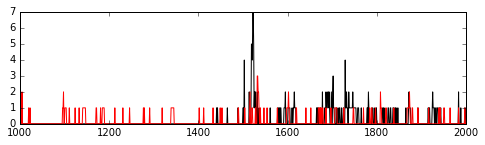

In [4]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Contacts shuffling $\text{P}[\pi_\mathcal{L}(\tau),\mathbf{t}^1,\mathbf{t}^w]$: `P__pitau_t1_tw(lks_data,dt)` ###
This function randomly shuffles the contacts of a timeline within $[t^1,t^w]$, for each timeline of a `link_timeline()` object `lks_data`. The time step duration `dt` is required.

In [5]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__pitau_t1_tw(lks_data,1)

Test of the modification of the activity timeline:

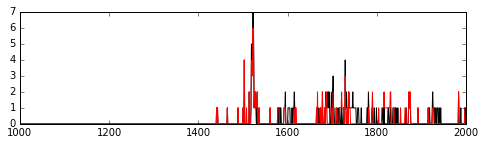

In [6]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Permutation of contacts and intercontacts within timelines $\text{P}[\pi_\mathcal{L}(\tau),\pi_\mathcal{L}(\Delta \tau)]$: `P__pitau_pidtau(lks_data,t_i,t_f,dt)` ###
This function randomly permutates the contacts and intercontacts within each timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [7]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__pitau_pidtau(lks_data,0,60480,1)

Test of the preservation of the $\pi_\tau$ and $\pi_{\Delta\tau}$:

In [8]:
dict_tau0 = rn.contact_durations(lks_data)
dict_dtau0 = rn.intercontact_durations(lks_data)
dict_tau1 = rn.contact_durations(new_lks)
dict_dtau1 = rn.intercontact_durations(new_lks)
Test_tau = np.array([set(dict_tau0[lk]) == set(dict_tau1[lk]) for lk in lks_data.links()])
Test_dtau = np.array([set(dict_dtau0[lk]) == set(dict_dtau1[lk]) for lk in lks_data.links()])
print Test_tau.all(),Test_dtau.all()

True True


Test of the modification of the activity timeline:

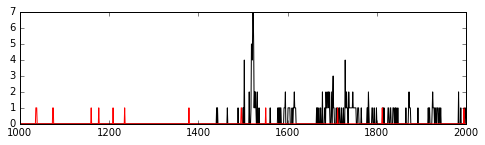

In [9]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Permutation of contacts and intercontacts within timelines with initial time $\text{P}[\pi_\mathcal{L}(\tau),\pi_\mathcal{L}(\Delta \tau),\mathbf{t}_1]$: `P__pitau_pidtau_t1(lks_data)` ###
This function randomly permutates the contacts and intercontacts within each timeline of a `link_timeline()` object `lks_data` while keeping the initial time.

In [10]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__pitau_pidtau_t1(lks_data)

Test of the preservation of $\pi_\tau$ and $\pi_{\Delta\tau}$:

In [11]:
dict_tau0 = rn.contact_durations(lks_data)
dict_dtau0 = rn.intercontact_durations(lks_data)
dict_tau1 = rn.contact_durations(new_lks)
dict_dtau1 = rn.intercontact_durations(new_lks)
Test_tau = np.array([set(dict_tau0[lk]) == set(dict_tau1[lk]) for lk in lks_data.links()])
Test_dtau = np.array([set(dict_dtau0[lk]) == set(dict_dtau1[lk]) for lk in lks_data.links()])
print Test_tau.all(),Test_dtau.all()

True True


Test of the modification of the activity timeline:

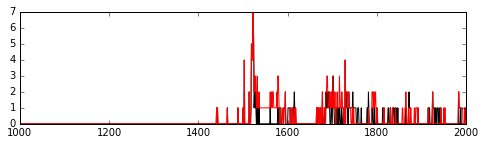

In [12]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Periodic boundary offset shuffling $\text{P}[\mathbf{per}(\Theta)]$: `P__perTheta(lks_data,t_i,t_f,dt)` ###
This function randomly offsets the time stamps of all contacts of a timeline, for each timeline of a `link_timeline()` object `lks_data`, with periodic boundary conditions between $t_i$ and $t_f$. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [13]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__perTheta(lks_data,0,60480,1)

Test of the modification of the activity timeline:

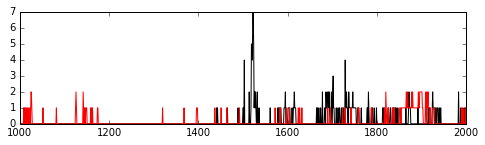

In [14]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Offset shuffling $\text{P}[\tau,\Delta\tau]$: `P__tau_dtau(lks_data,t_i,t_f,dt)` ###
This function randomly offsets the time stamps of all contacts of a timeline within $[t_i,t_f]$, for each timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [15]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__tau_dtau(lks_data,0,60480,1)

Test of the modification of the activity timeline:

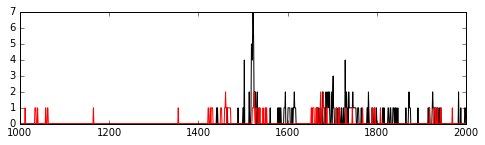

In [16]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()